In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.4)
# DataThief

# Radius in arcsec
bulgesbp_arcsec = np.loadtxt("../data/NGC5005-bulge_arcsec.txt")
rarcsec, bulge_arcsec, Yerr_arcsec1, Yerr_arcsec2 = bulgesbp_arcsec.T

# Radius in kpc
bulgesbp_kpc = np.loadtxt("../data/NGC5005-bulge_kpc.txt")
rkpc, bulge_kpc, Yerr_kpc1, Yerr_kpc2 = bulgesbp_kpc.T

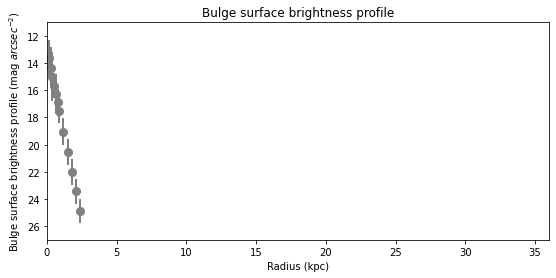

In [3]:
# Plot Bulge surface brightness profile in kpc
plt.figure(figsize=(9,4))
#plt.scatter(rkpc,bulge_kpc)
plt.errorbar(rkpc,bulge_kpc,yerr=[Yerr_kpc1,Yerr_kpc2], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (kpc)")
plt.ylabel("Bulge surface brightness profile (mag $arcsec^{-2}$)")
plt.xlim(0,36)
plt.ylim(27,11)
plt.show()

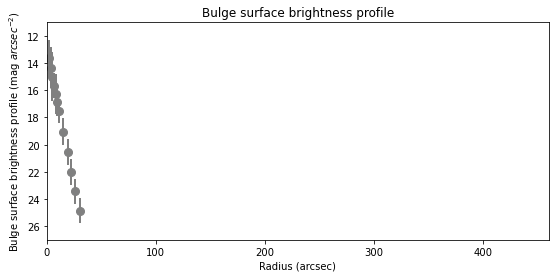

In [4]:
# Plot Bulge surface brightness profile in arcsec
plt.figure(figsize=(9,4))
plt.scatter(rarcsec,bulge_arcsec)
plt.errorbar(rarcsec,bulge_arcsec,yerr=[Yerr_arcsec1,Yerr_arcsec2], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (arcsec)")
plt.ylabel("Bulge surface brightness profile (mag $arcsec^{-2}$)")
plt.xlim(0,460)
plt.ylim(27,11)
plt.show()

In [5]:
# Convert Mag/arcsec**2 to MSun/pc**2

distance = 16.5                             # Distance in megaparsec (from https://academic.oup.com/mnras/article/449/4/3981/1195237#920592944)

"""# Convert Mag to Msun
bulge_LSun_arcsec = 10**(-0.4*bulge_kpc)
bulge_MSun_arcsec = 0.4*bulge_LSun_arcsec
#bulge_MSun_pc = (4.8481e-6 * distance)**(-2) * bulge_MSun_arcsec
bulge_MSun_pc = (distance)**(-2) * bulge_MSun_arcsec
print(bulge_MSun_pc)"""

# Convert 
bulge_LSun_arcsec = 10**(0.4*((bulge_kpc - 21.57) / 4.84)) 
bulge_MSun_pc = 0.4*bulge_LSun_arcsec
print(bulge_MSun_pc)

[0.08877177 0.10137235 0.11537663 0.12958287 0.1465081  0.16346146
 0.18481168 0.24747485 0.3270061  0.43500049 0.57101402 0.7520415 ]


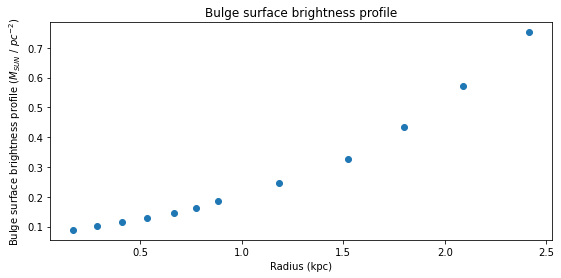

In [6]:
# Plot Bulge surface brightness profile in MSun/pc**2
plt.figure(figsize=(9,4))
plt.scatter(rkpc,bulge_MSun_pc)
#plt.scatter(rkpc,bulge_MSun_arcsec)
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (kpc)")
plt.ylabel("Bulge surface brightness profile ($M_{SUN}$ / $pc^{-2}$)")
#plt.ylim(0,1e-9)
plt.show()

In [7]:
# Radius in kpc
np.savetxt("../data/bulge_msun_pc.txt", 
           np.transpose([rkpc, bulge_MSun_pc]), 
           delimiter='\t', 
           fmt='%10.5f',
           header='Datathief \n Bulge Surface Brightness from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.4) \n MAG/ARCSEC**2 converted to MSUN/PC**2 in python \n units: x-axis: kpc, y-axis: Bulge (Msun pc^-2)')

In [8]:
# from # from http://astroweb.cwru.edu/SPARC/ (Bulge-Disk Decomposition)

# Radius in kpc
bulgesbp_kpc_SPARC = np.loadtxt("../data/NGC5005-bulgediskdec-SPARC.txt")
rkpc_SPARC, disk_LSol_SPARC, bulge_LSol_SPARC = bulgesbp_kpc_SPARC.T

# Convert to MSun pc^-2
#ML = 0.4
ML = 1
bulge_MSun_pc_SPARC = ML*bulge_LSol_SPARC

<ipython-input-9-30acce9bffdf>:3: RuntimeWarning: divide by zero encountered in log10
  bulge_Mag_arcsec_SPARC = 26.4 - 2.5*np.log10(bulge_MSun_arcsec_SPARC)  ## 26.4 is just a guess, see source below


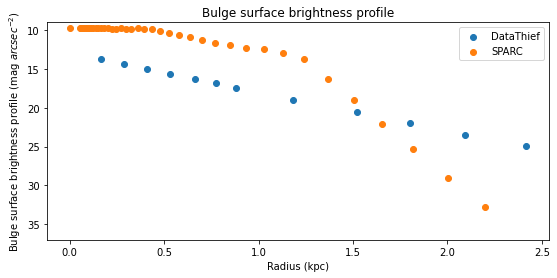

In [9]:
#Converting back to Mag arcsec*-2
bulge_MSun_arcsec_SPARC = bulge_MSun_pc_SPARC * distance**2
bulge_Mag_arcsec_SPARC = 26.4 - 2.5*np.log10(bulge_MSun_arcsec_SPARC)  ## 26.4 is just a guess, see source below
                                                                       ## Source: http://myslu.stlawu.edu/~aodo/astronomy/ALFALFA/Astronomy%20Basics/IntensityToMagnitudes.pdf

# Plot Bulge surface brightness profile in kpc
plt.figure(figsize=(9,4))
plt.scatter(rkpc,bulge_kpc, label="DataThief")
plt.scatter(rkpc_SPARC,bulge_Mag_arcsec_SPARC, label="SPARC")
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (kpc)")
plt.ylabel("Bulge surface brightness profile (mag $arcsec^{-2}$)")
#plt.xlim(0,36)
plt.ylim(37,9)
plt.legend()
plt.show()

In [10]:
# Radius in kpc
np.savetxt("../data/Z_bulge_sparc.rcl", 
           np.transpose([rkpc_SPARC, bulge_Mag_arcsec_SPARC]), 
           delimiter='\t', 
           fmt='%10.5f')

In [13]:
# Radius in kpc
bulgesbp_kpc_SPARC = np.loadtxt("../data/5005_newdisk.txt")
rkpc_SPARC, bulge_LSol_SPARC = bulgesbp_kpc_SPARC.T

# Radius in kpc
np.savetxt("../data/whodisk.rcl", 
           np.transpose([rkpc_SPARC, bulge_LSol_SPARC]), 
           delimiter='\t', 
           fmt='%10.5f')